Mounting drive to input data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing all the libraries

In [ ]:
import numpy as np
import math
from PIL import *
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Import svm model
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Reading the input images

In [ ]:
happ_loc=['01','02','04','06','07','09','10','12','13']
sad_loc=['02','03','04','05','06','07','09','10','11','12','13']
happy_images = []
for i in happ_loc:
  loc='drive/MyDrive/Data/emotion_classification/train/subject'+i+'.happy.gif'
  img=Image.open(loc)
  img1=img.resize((100,100))
  img_arr=np.array(img1)
  img_arr=img_arr.reshape(10000,)
  happy_images.append(img_arr)
happyImages=np.array(happy_images)
sad_images = []
for i in sad_loc:
  loc='drive/MyDrive/Data/emotion_classification/train/subject'+i+'.sad.gif'
  img=Image.open(loc)
  img1=img.resize((100,100))
  img_arr=np.array(img1)
  img_arr=img_arr.reshape(10000,)
  sad_images.append(img_arr)
sadImages=np.array(sad_images)
happyImages = happyImages/255
sadImages = sadImages/255
temp1=[]
for i in happyImages:
  temp1.append(i)
for i in sadImages:
  temp1.append(i)
trainImages=np.array(temp1)        
trainImages.shape                     #Given training data

(20, 10000)

Labeling the input images

In [ ]:
labels = []                 #1 for happy and 0 for sad
for i in range(20):
  if i<9:
    labels.append(1)
  else:
    labels.append(0)
labelTrain = np.array(labels)
print(labelTrain)

[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


Inputing the test images:

In [ ]:
test_happ_loc=['03','05','08','11','14','15']
test_sad_loc=['01','08','14','15']
test_images = []
for i in test_happ_loc:
  loc='drive/MyDrive/Data/emotion_classification/test/subject'+i+'.happy.gif'
  img=Image.open(loc)
  img1=img.resize((100,100))
  img_arr=np.array(img1)
  img_arr=img_arr.reshape(10000,)
  test_images.append(img_arr)
for i in test_sad_loc:
  loc='drive/MyDrive/Data/emotion_classification/test/subject'+i+'.sad.gif'
  img=Image.open(loc)
  img1=img.resize((100,100))
  img_arr=np.array(img1)
  img_arr=img_arr.reshape(10000,)
  test_images.append(img_arr)
testImages=np.array(test_images)
testImages = np.array(test_images)/255
# print(testImages.shape)
labelTest = []
for i in range(10):
  if i<6:
    labelTest.append(1)
  else:
    labelTest.append(0)
labelTest = np.array(labelTest)
# print(labelTest)
allData = np.concatenate((trainImages,testImages),axis = 0)
allLabels = np.concatenate((labelTrain,labelTest))

Function for accuracy calculation:

In [ ]:
def accuracy(a,b):
  ctr = 0
  for i in range(len(a)):
    if a[i] == b[i]:
      ctr +=1
  return (ctr/len(a))*100

Defining parameters:

In [ ]:
typesKernel = ['linear', 'sigmoid', 'poly', 'rbf']
C = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]

Training SVM and running it over test data for different values of PCA components, kernel types, C, epsilon and taking the maximum over them.

In [ ]:
maxAccuracySVM = []
for k in range(1,21):
    accuracy1 = []
    for ker in typesKernel:
        for c in C:
            for ep in epsilon:
                pca = PCA(n_components = k)
                allPCA = pca.fit_transform(allData)
                # print(allPCA.shape)
                CModel = c
                epsilon1 = ep
                #Create a svm Classifier
                clf = svm.SVC(random_state =1, kernel = ker , C = CModel, tol=epsilon1) # Linear Kernel
                trainPCA = allPCA[0:20,:]
                clf.fit(trainPCA,labels)
                testPCA = allPCA[20:30,:]
                y_pred = clf.predict(testPCA)
                a = accuracy(y_pred,labelTest)
                accuracy1.append(a)
                print("PCA components:{} || kernel:{} || C:{} || epsilon:{} || accuracy:{}".format(k,ker,c,ep,a))
    maxAccuracySVM.append(max(accuracy1))


PCA components:1 || kernel:linear || C:0.01 || epsilon:0.01 || accuracy:40.0
PCA components:1 || kernel:linear || C:0.01 || epsilon:0.1 || accuracy:40.0
PCA components:1 || kernel:linear || C:0.01 || epsilon:1 || accuracy:40.0
PCA components:1 || kernel:linear || C:0.1 || epsilon:0.01 || accuracy:40.0
PCA components:1 || kernel:linear || C:0.1 || epsilon:0.1 || accuracy:40.0
PCA components:1 || kernel:linear || C:0.1 || epsilon:1 || accuracy:40.0
PCA components:1 || kernel:linear || C:1 || epsilon:0.01 || accuracy:40.0
PCA components:1 || kernel:linear || C:1 || epsilon:0.1 || accuracy:40.0
PCA components:1 || kernel:linear || C:1 || epsilon:1 || accuracy:40.0
PCA components:1 || kernel:sigmoid || C:0.01 || epsilon:0.01 || accuracy:40.0
PCA components:1 || kernel:sigmoid || C:0.01 || epsilon:0.1 || accuracy:40.0
PCA components:1 || kernel:sigmoid || C:0.01 || epsilon:1 || accuracy:40.0
PCA components:1 || kernel:sigmoid || C:0.1 || epsilon:0.01 || accuracy:40.0
PCA components:1 || kern

Doing LDA over training data and testing on test data using LDA.

In [ ]:
accuracyLDA = []
for i in range(1, 21):
  pca = PCA(n_components = i)
  allPCA = pca.fit_transform(allData)
  trainPCA = allPCA[0:20,:]
  testPCA = allPCA[20:30,:]
  clf2 = LinearDiscriminantAnalysis()
  clf2.fit(trainPCA,labels)
  y_pred2 = clf2.predict(testPCA)
  b = accuracy(y_pred2,labelTest)
  accuracyLDA.append(b)
  print("PCA components:{} || accuracy:{}".format(i,b))

PCA components:1 || accuracy:40.0
PCA components:2 || accuracy:40.0
PCA components:3 || accuracy:60.0
PCA components:4 || accuracy:60.0
PCA components:5 || accuracy:80.0
PCA components:6 || accuracy:100.0
PCA components:7 || accuracy:70.0
PCA components:8 || accuracy:80.0
PCA components:9 || accuracy:80.0
PCA components:10 || accuracy:90.0
PCA components:11 || accuracy:80.0
PCA components:12 || accuracy:70.0
PCA components:13 || accuracy:60.0
PCA components:14 || accuracy:60.0
PCA components:15 || accuracy:60.0
PCA components:16 || accuracy:60.0
PCA components:17 || accuracy:60.0
PCA components:18 || accuracy:60.0
PCA components:19 || accuracy:70.0
PCA components:20 || accuracy:80.0


Comparing LDA and SVM over different PCA componets.

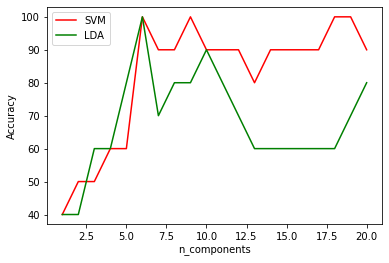

In [ ]:
plt.plot([i for i in range(1,21)], maxAccuracySVM, label = 'SVM', color="red")
plt.plot([i for i in range(1,21)], accuracyLDA, label = 'LDA', color="green")
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph is plotted againts the number of PCA components. For N=6 LDA and SVM gives 100% accuracy. SVM also gives 100% accuracy for 8,18,19 PCA components. 
In general SVM gives better accuracy (over all c, epsilon, kernel types). LDA works well for low feature components but SVM overtakes as the number of PCA components increases. 
In SVM we are varing the kernel type, epsilon, c and taking maximum accuracy over them. This also contributes to higher performance of SVM. 
In SVM we try to select a hyperplane with maximizing the soft margin, where in LDA we just maximize the between class varinace and minimize the within class variance. 